In [116]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# os.environ['KAGGLE_USERNAME'] = 'anishkumargupta1905'
# os.environ['KAGGLE_KEY'] = 'bdeda24d38dc3611f5e7ed630b49cc7d'

In [4]:
# !kaggle datasets download tawsifurrahman/covid19-radiography-database

 99% 771M/778M [00:06<00:00, 229MB/s]
100% 778M/778M [00:06<00:00, 118MB/s]


In [7]:
# !unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [117]:
 len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [118]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

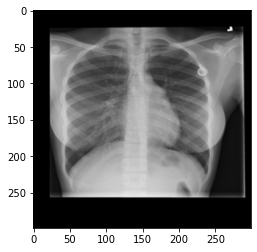

In [4]:
import cv2
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-1.png')
image_plot = plt.imshow(img)

In [5]:
img.shape

(299, 299, 3)

In [6]:
img2 = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-2.png')

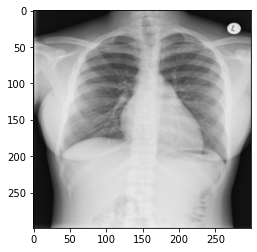

In [7]:
image_2 = plt.imshow(img2)

In [8]:

import pandas as pd

df = pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


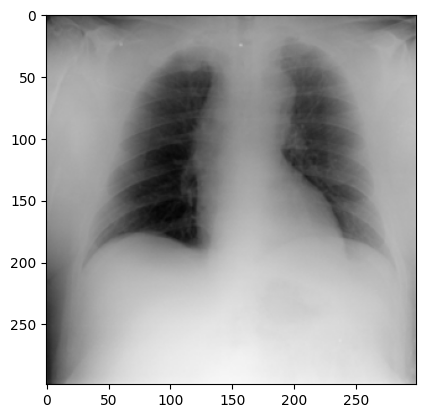

In [20]:
i2 = cv2.imread('COVID-19_Radiography_Dataset/COVID/images/COVID-3584.png')
i3 = plt.imshow(i2)
urls =  os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [9]:

urls =  os.listdir('COVID-19_Radiography_Dataset/COVID/images')

path = 'COVID-19_Radiography_Dataset/COVID/images/'+urls[2]
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-100.png'

In [119]:
def loadImages(path , urls , target):
    
        
    images = []
    labels = []
  
    for i in range(len(urls)):
        
        
        img_path = path + urls[i]
        img = cv2.imread(img_path)
        img = img /255.0
        img = cv2.resize(img , (100 , 100))
        images.append(img)
        labels.append(target)
    
    images = np.asarray(images)

    return images , labels
# target 0 1 for non covid and covid patient

In [13]:
import numpy as np

In [79]:
covid_path = 'COVID-19_Radiography_Dataset/COVID/images/'
covid_urls = os.listdir(covid_path)
len(covid_urls)

covidImages , covidTarget =  loadImages(covid_path , covid_urls , 1)
# icovid = cv2.imread(covid_path+covid_urls[2])
# print(icovid)
# plt.imshow(icovid)

In [80]:
normal_path = 'COVID-19_Radiography_Dataset/Normal/images/'
normal_urls = os.listdir(normal_path)
normalImages , normalTargets = loadImages(normal_path , normal_urls , 0 )

# normal_urls[1]
# inormal = cv2.imread(normal_path+normal_urls[1])
# ii = plt.imshow(inormal)


In [17]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)

In [27]:
normalImages.shape

(10192, 299, 299, 3)

In [18]:
covidImages.shape 


(3616, 299, 299, 3)

In [120]:
data = np.r_[covidImages ,normalImages]
data.shape

(13808, 100, 100, 3)

In [85]:
targets = np.r_[covidTarget , normalTargets]


In [86]:
targets.shape

(13808,)

In [82]:
len(covid_urls) , len(covidImages) 

(3616, 3616)

In [121]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(data , targets , test_size = 0.25)

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Flatten , Dense

In [123]:
X_train.shape
normalImages.shape

(10192, 100, 100, 3)

In [124]:
model = Sequential([
    Conv2D(32 , 3 , input_shape=(100 ,100,3)  ,activation = 'relu') , 
    MaxPooling2D(), 
    Conv2D(16 , 3 , activation = 'relu') , 
    MaxPooling2D() , 
    Conv2D(16 , 3 , activation = 'relu'),
    MaxPooling2D() , 
    Flatten(),
    Dense(512 , activation = 'relu') , 
    Dense(256 , activation = 'relu') , 
    Dense(1 , activation = 'sigmoid')
])

In [125]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 16)      

In [126]:
model.compile(optimizer = 'adam' , loss = tf.keras.losses.BinaryCrossentropy() , metrics =['accuracy'])


In [127]:
model.fit(X_train , y_train, batch_size = 32 , epochs = 5 , validation_data = (X_test ,y_test))

Epoch 1/5
324/324 [==============================] - 92s 269ms/step - loss: 0.4013 - accuracy: 0.8160 - val_loss: 0.3032 - val_accuracy: 0.8647
Epoch 2/5
324/324 [==============================] - 81s 249ms/step - loss: 0.2730 - accuracy: 0.8819 - val_loss: 0.2726 - val_accuracy: 0.8789
Epoch 3/5
324/324 [==============================] - 79s 245ms/step - loss: 0.2117 - accuracy: 0.9134 - val_loss: 0.1857 - val_accuracy: 0.9227
Epoch 4/5
324/324 [==============================] - 80s 248ms/step - loss: 0.1834 - accuracy: 0.9228 - val_loss: 0.1750 - val_accuracy: 0.9342
Epoch 5/5
324/324 [==============================] - 79s 245ms/step - loss: 0.1483 - accuracy: 0.9410 - val_loss: 0.1414 - val_accuracy: 0.9432


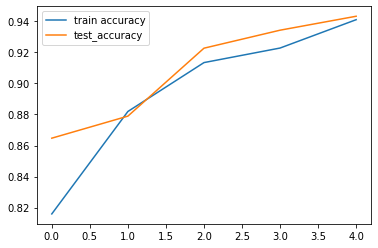

In [129]:
plt.plot(model.history.history['accuracy'] , label ='train accuracy')
plt.plot(model.history.history['val_accuracy'] ,label ='test_accuracy')
plt.legend()
plt.show()

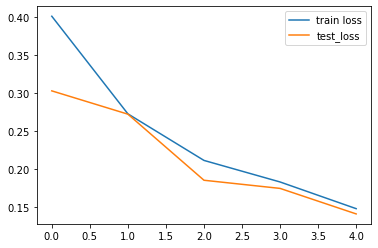

In [130]:
plt.plot(model.history.history['loss'] , label = 'train loss')
plt.plot(model.history.history['val_loss'] , label ='test_loss')
plt.legend()
plt.show()